# Pytorch logistic regression

## 1. Fire up

In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## 2. Data generating

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
X = data.data # extract target
y = data.target.reshape(-1, 1) # extract label

`reshape(-1, 1)`将目标变量从一维数组转换为二维数组的列向量形式,是NumPy数组的一种形状变换操作。它的作用是将数组从原始形状转换为新的形状，其中的 -1 表示自动推断维度大小。

这样处理是因为在scikit-learn中，目标变量通常需要是一个二维数组的列向量，其中每行对应一个样本的标签。

具体地，`reshape(-1, 1)`会将数组的第一个维度设为自动推断的值，而将第二个维度设为1。这样的操作实际上是将原始数组转换为一个列向量，其中每个元素独立占据一行。

举个例子，假设有一个一维数组 `arr = [1, 2, 3, 4, 5]`，通过 `arr.reshape(-1, 1)` 操作，可以得到一个列向量：

```
[[1],
 [2],
 [3],
 [4],
 [5]]
```

In [6]:
print(X.shape) # 569个30维向量
print(y.shape) # 569个1维向量

(569, 30)
(569, 1)


In [7]:
# 将数组或矩阵进行切片操作，用于将数据集分割为训练集和测试集
X_train = X[:500,:] # 对矩阵X进行切片，选择第0行到第499行（共500行）的所有列，即选取X的前500行作为训练集
y_train = y[:500,:]

X_test = X[500:,:] # 对矩阵X进行切片，选择从第500行开始到最后一行的所有列，即选取X的第500行及以后的所有行作为测试集
y_test = y[500:,:]

在这里，`:`表示选取所有元素的范围，用于指定切片的起始和结束位置，如`a[:500]`表示选取数组a的前500个元素。

对于二维数组或矩阵，可以使用`:`对行和列同时进行切片操作，如`a[:500, :]`表示选取前500行的所有列。

In [10]:
# 将 NumPy 数组转换为 Pandas DataFrame 对象
training_X = pd.DataFrame(X_train)
training_y = pd.DataFrame(y_train)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

DataFrame类似于表格或电子表格，可以存储和操作二维数据。

这样做的目的可能是为了方便后续使用 Pandas 提供的数据分析和处理功能，比如进行数据预处理、特征工程、模型训练等。

Pandas 的 DataFrame 提供了更多灵活的数据操作和分析方法，能够更方便地处理和探索数据。

In [9]:
training_X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.1388,0.1700,0.1017,0.2369,0.06599
496,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,14.38,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.1407,0.3230,0.10330
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.1276,0.2506,0.2028,0.1053,0.3035,0.07661
498,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.1412,0.3089,0.3533,0.1663,0.2510,0.09445


In [11]:
test_X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,15.040,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,...,16.760,20.43,109.70,856.9,0.11350,0.21760,0.1856,0.10180,0.2177,0.08549
1,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.010,32.94,106.00,788.0,0.17940,0.39660,0.3381,0.15210,0.3651,0.11830
2,12.540,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,0.06612,...,13.570,21.40,86.67,552.0,0.15800,0.17510,0.1889,0.08411,0.3155,0.07538
3,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,0.05484,...,30.790,23.87,211.50,2782.0,0.11990,0.36250,0.3794,0.22640,0.2908,0.07277
4,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.280,16.38,69.05,300.2,0.19020,0.34410,0.2099,0.10250,0.3038,0.12520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
65,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
66,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
67,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400


## 3. Model training

$$\vec{x}\in\mathbb{R}^{1\times 30}$$

$$W\in\mathbb{R}^{30\times 1}$$

$$b\in\mathbb{R}$$

$$z = \vec{x}W+b$$

$$\hat{y} = \sigma(z) = \frac{1}{1+e^{-z}}$$

***
**Cross Entropy Loss Function**

$$Loss(W，b) = -\frac{1}{N}\sum_{i = 1}^{N}[y_i\log\hat{y_i} + (1 - y_i)\log (1-\hat{y_i})]$$

***
$$k = 0,1,2,...$$

$$W^{(k+1)}= W^{(k)} - \alpha_k\frac{\partial Loss (W^{(k)}, b^{(k)})}{\partial W}$$

$$b^{(k+1)}= b^{(k)} - \alpha_k\frac{\partial Loss (W^{(k)}, b^{(k)})}{\partial b}$$

In [20]:
# 使用 PyTorch 定义了两个可训练的变量（参数）：W 和 b
W = torch.tensor(np.zeros((30, 1)), dtype = torch.float32, requires_grad = True)
b = torch.tensor(np.array([0]), dtype = torch.float32, requires_grad = True)

使用 `torch.tensor` 创建张量，并传入 `np.zeros((30, 1))` 来初始化权重 W，表示一个大小为 30x1 的全零张量。

使用 `dtype=torch.float32` 设置张量的数据类型为 float32。

设置 `requires_grad = True`，以便在计算中跟踪并计算梯度。

注意：在新版本的 PyTorch 中，`Variable` 被废弃了，直接使用 `torch.tensor` 创建张量即可。

In [19]:
print("Initial value of w =", W.T)
print("---------------------------------------------------------")
print("Initial value of b =", b)

Initial value of w = tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]], grad_fn=<PermuteBackward0>)
---------------------------------------------------------
Initial value of b = tensor([0.], requires_grad=True)


In [21]:
# 将 training_X 和 training_y 向量化（vertorization）处理
X_vec = torch.tensor(training_X.values, dtype=torch.float32)  # N*30
y_vec = torch.tensor(training_y.values, dtype=torch.float32).reshape(-1, 1)  # N*1

使用 `torch.tensor` 创建张量，并传入 `training_X.values` 将 `training_X` 转换为张量 `X_vec`，数据类型设置为 float32。

使用 `torch.tensor` 创建张量，并传入 `training_y.values` 将 `training_y` 转换为张量 `y_vec`，数据类型设置为 float32，并使用 `reshape(-1, 1)` 将其形状改为 `N*1`，其中 N 表示样本数量。

In [24]:
X_vec.shape

torch.Size([500, 30])

In [25]:
y_vec.shape

torch.Size([500, 1])

In [29]:
Iter_times = 100000 # 迭代次数
alpha = 0.000015 # 设置初始学习率
loss_list = [] # 储存每一次迭代后的损失函数（如果递减，说明梯度下降是成功的）

for i in range(Iter_times):
    z = torch.mm(X_vec, w) + b # mm：矩阵乘法，500*1
    y_hat = torch.sigmoid(z) # 500*1
    
    # 交叉熵损失函数
    loss_vec = -(y_vec * torch.log(y_hat) + (1.0 - y_vec) * torch.log (1.0 - y_hat))
    loss = torch.mean(loss_vec) # 取平均
    
    # 求导
    loss.backward()
    
    # 获取梯度
    grad_w = w.grad.data
    grad_b = b.grad.data
    
    # 学习率
    alpha_temp = alpha / (1 + 0.001 * i)
    
    # 用alpha调整梯度
    w.data = w.data - alpha_temp * grad_w
    b.data = b.data - alpha_temp * grad_b
     
    # 开始下次梯度之前要清零（否则会不收敛）
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # 输出
    print(i + 1, "iterations have been completed!")
    print("      -> Now w1 =", w[0,0])
    print("      -> Now w2 =", w[1,0])
    print("      -> Now b =", b[0])
    print("      -> Now Loss =", loss)
    print("---------------------------------------------------------")
    
    loss_list.append(loss)
    length = len(loss_list)

    # 当损失函数的变化 < 10^-5 时，认为模型已经收敛到一个较好的解，无需继续迭代
    if(torch.abs(loss_list[length - 1] - loss_list[length - 2]) < 10 ** (-5) and length >= 2):
        break

1 iterations have been completed!
      -> Now w1 = tensor(0.0001, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0002, grad_fn=<SelectBackward0>)
      -> Now b = tensor(1.2350e-05, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(2.8345, grad_fn=<MeanBackward0>)
---------------------------------------------------------
2 iterations have been completed!
      -> Now w1 = tensor(8.6309e-05, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0002, grad_fn=<SelectBackward0>)
      -> Now b = tensor(1.2469e-05, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.7095, grad_fn=<MeanBackward0>)
---------------------------------------------------------
3 iterations have been completed!
      -> Now w1 = tensor(0.0002, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0003, grad_fn=<SelectBackward0>)
      -> Now b = tensor(2.0564e-05, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(1.4803, grad_fn=<MeanBackward0>)
-------------------------------------------------

259 iterations have been completed!
      -> Now w1 = tensor(0.0030, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0054, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0004, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.3136, grad_fn=<MeanBackward0>)
---------------------------------------------------------
260 iterations have been completed!
      -> Now w1 = tensor(0.0030, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0054, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0004, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.3134, grad_fn=<MeanBackward0>)
---------------------------------------------------------
261 iterations have been completed!
      -> Now w1 = tensor(0.0030, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0054, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0004, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.3131, grad_fn=<MeanBackward0>)
---------------------------------------------------------
2

529 iterations have been completed!
      -> Now w1 = tensor(0.0041, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0071, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0005, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2767, grad_fn=<MeanBackward0>)
---------------------------------------------------------
530 iterations have been completed!
      -> Now w1 = tensor(0.0041, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0071, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0005, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2766, grad_fn=<MeanBackward0>)
---------------------------------------------------------
531 iterations have been completed!
      -> Now w1 = tensor(0.0041, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0072, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0005, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2765, grad_fn=<MeanBackward0>)
---------------------------------------------------------
5

      -> Now w2 = tensor(0.0081, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0006, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2605, grad_fn=<MeanBackward0>)
---------------------------------------------------------
798 iterations have been completed!
      -> Now w1 = tensor(0.0048, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0081, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0006, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2604, grad_fn=<MeanBackward0>)
---------------------------------------------------------
799 iterations have been completed!
      -> Now w1 = tensor(0.0048, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0081, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0006, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2604, grad_fn=<MeanBackward0>)
---------------------------------------------------------
800 iterations have been completed!
      -> Now w1 = tensor(0.0048, grad_fn=<SelectBackward0>)
 

      -> Now w2 = tensor(0.0088, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0007, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2508, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1070 iterations have been completed!
      -> Now w1 = tensor(0.0053, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0088, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0007, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2508, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1071 iterations have been completed!
      -> Now w1 = tensor(0.0053, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0088, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0007, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2508, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1072 iterations have been completed!
      -> Now w1 = tensor(0.0053, grad_fn=<SelectBackward0>

1348 iterations have been completed!
      -> Now w1 = tensor(0.0058, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0093, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0008, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2443, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1349 iterations have been completed!
      -> Now w1 = tensor(0.0058, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0093, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0008, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2443, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1350 iterations have been completed!
      -> Now w1 = tensor(0.0058, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0093, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0008, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2442, grad_fn=<MeanBackward0>)
--------------------------------------------------------

1607 iterations have been completed!
      -> Now w1 = tensor(0.0061, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0096, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0008, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2399, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1608 iterations have been completed!
      -> Now w1 = tensor(0.0061, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0096, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0008, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2399, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1609 iterations have been completed!
      -> Now w1 = tensor(0.0061, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0096, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0008, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2399, grad_fn=<MeanBackward0>)
--------------------------------------------------------

      -> Now b = tensor(0.0009, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2365, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1876 iterations have been completed!
      -> Now w1 = tensor(0.0063, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0099, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0009, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2364, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1877 iterations have been completed!
      -> Now w1 = tensor(0.0063, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0099, grad_fn=<SelectBackward0>)
      -> Now b = tensor(0.0009, grad_fn=<SelectBackward0>)
      -> Now Loss = tensor(0.2364, grad_fn=<MeanBackward0>)
---------------------------------------------------------
1878 iterations have been completed!
      -> Now w1 = tensor(0.0063, grad_fn=<SelectBackward0>)
      -> Now w2 = tensor(0.0099, grad_fn=<SelectBackward0>

## 4. Visualization of the Cross Entropy Function

The length of loss_list is: 2025


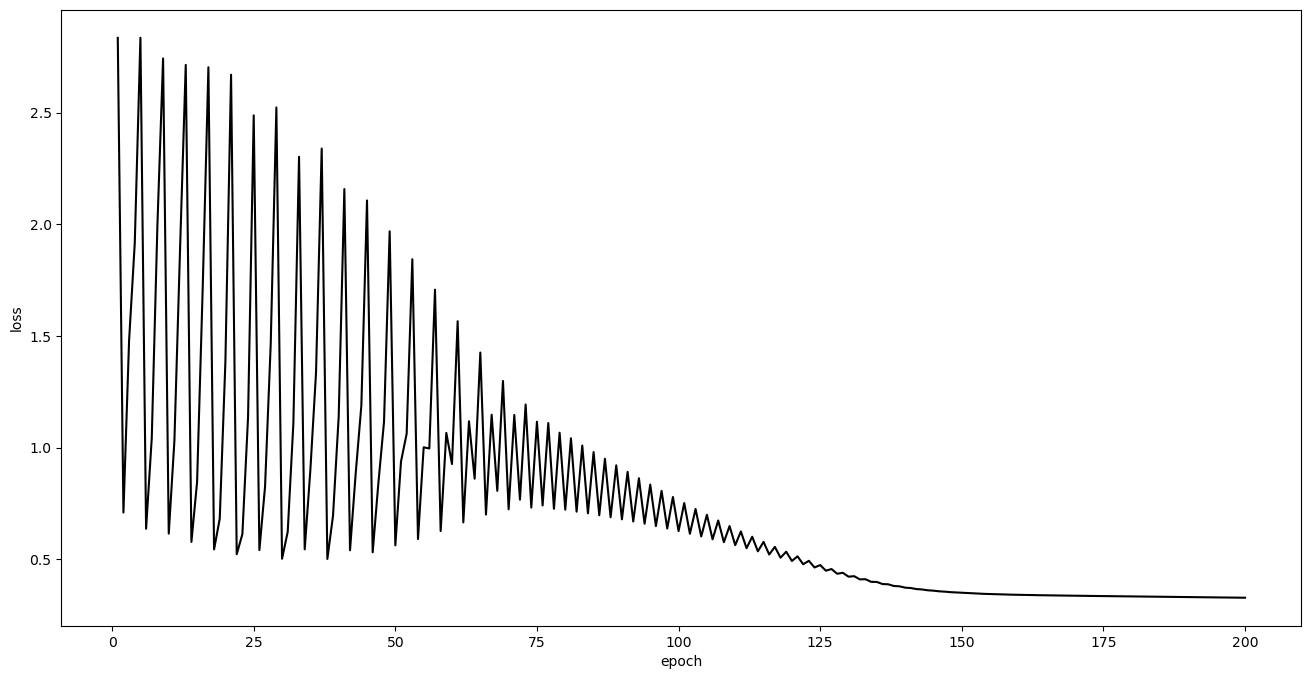

In [35]:
plt.figure(figsize=(16, 8))
length = len(loss_list)
print("The length of loss_list is:", length)
plt.plot(np.arange(1, 201, 1), [loss.detach().numpy() for loss in loss_list[0:200]], "black") # 画前200个iter
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

在绘制图形时，尝试调用 `numpy()` 函数将具有梯度的张量转换为NumPy数组，但是具有梯度的张量不支持直接转换为NumPy数组。

为了解决这个问题，使用 `detach().numpy()` 方法将具有梯度的张量分离出来，并将其转换为NumPy数组。

## 5. Prediction on the test set and model evaluation

In [38]:
# 调用测试集的数据
X_vec_test = torch.tensor(test_X.values, dtype=torch.float32)  # N*30
y_vec_test = torch.tensor(test_y.values, dtype=torch.float32).reshape(-1, 1)  # N*1

# 同样，还是向量化处理，得到预测的概率值
z_test = torch.mm(X_vec_test, w) + b  # 69*1
y_pred = torch.sigmoid(z_test)  # 69*1，得到的是概率

In [41]:
# 把连续的概率值y_pred转换成 0 or 1
y_pred[y_pred < 0.5] = 0.0
y_pred[y_pred > 0.5] = 1.0
print(y_pred)

tensor([[1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
         1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.]],
       grad_fn=<AsStridedBackward0>)


In [43]:
test_y.T # 看看真实的测试集数据，.T表示转置

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,1,0,1,0,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0,0,1


In [45]:
y_pred_np = y_pred.detach().numpy()
y_pred_np = np.squeeze(y_pred_np)
print("Shape of y_pred_p:", y_pred_np.shape)

Shape of y_pred_p: (69,)


将具有梯度的张量 `y_pred` 分离出来，并将其转换为NumPy数组。

首先，使用 `detach()` 方法将 `y_pred` 张量分离出来，这样就得到一个没有梯度的新张量。然后，使用 `numpy()` 方法将该新张量转换为NumPy数组。最后，使用 `np.squeeze()` 函数将数组中的维度为1的维度去除，得到一个形状更紧凑的数组。

In [46]:
# 计算预测结果 y_pred_np 和测试集标签 test_y 的准确率
accuracy = accuracy_score(test_y, y_pred_np)
print("The accuracy score is:", accuracy)

The accuracy score is: 0.9130434782608695


`accuracy_score` 函数用于计算分类任务的准确率。

`accuracy = accuracy_score(y_true, y_pred)`

其中：

`y_true` 是真实的标签，可以是一个一维数组或列表。

`y_pred` 是预测的标签，可以是一个一维数组或列表，与 `y_true` 的长度必须相等。